### Tutorial 7

$$\frac{dC_1}{dt}=r_1C_1 $$



$$\frac{dC_2}{dt}=r_2C_1 $$



$$r_1-2r_2=\frac{-C_1}{C_2}$$



$$2r_1-3r_3=-C_2$$



$$r_1-r_2+r_3=\frac{5}{C_2} $$



$$ C_1(0)=15 \,\, , C_2(0)=2 $$ 



Plot the values of $C_1$ and $C_2$ from $t=0$ to $t=1$:

Take the formulation from **tut 0**:


Start by writing the 3 algebraic equations in matrix format and define a 'response function' in terms of $C_1$ and $C_2$.

Define the differential equations as the 'fermenter equation' and integrate with odeint.

The answer should look like this:

<img src="tut7ans.png" width="400" />


In [8]:
import numpy 
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [9]:
C1init = 15
C2init = 2

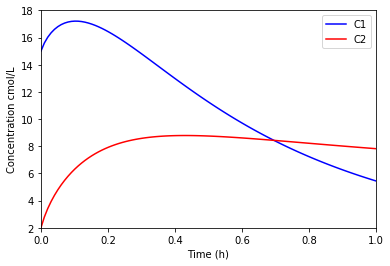

In [10]:
#Functions
def resp_func(C):
    C1, C2 =C[0],C[1]
       
    S = numpy.matrix([[1,-2,0],
                      [2,0,-3],
                      [1,-1,1]])
    U = numpy.matrix([-C1/C2,-C2,5/C2]).T
    r = numpy.linalg.solve(S, U) 
        
    
    return [r[0,0],   
            r[1,0],
            r[2,0]]

def ferm_eq(C,t):
    C1, C2 = C[0],C[1]         # order of components very important 
    r=resp_func([C1, C2])      # this is the 'fetching' from the response function
    
    return [r[0]*C1,   #DE1
            r[1]*C1]   #DE2 

#Integration

t=numpy.linspace(0,1,100)
C = odeint(ferm_eq,[C1init,C2init], t)

C1=C[:,0]                                  
C2=C[:,1]


plt.plot(t, C1, color='blue', label='C1')
plt.plot(t, C2, color='red',label='C2')
plt.axis([0,1, 2, 18])
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('Time (h)') 
plt.show()